# Visualize Slides

We develop visualizations for `Slide` sequences.

In [1]:
from typing import List
from functools import reduce
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection._search import ParameterGrid
import umap

import NegativeClassOptimization.config as config
import NegativeClassOptimization.preprocessing as preprocessing
import NegativeClassOptimization.utils as utils

/home/eugen/miniconda3/envs/ab-negative-training/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = utils.load_global_dataframe()
df.head(2)

,ID_slide_Variant,CDR3,Best,Slide,Energy,Structure,UID,Antigen
0,1873658_06a,CARPENLLLLLWYFDVW,True,LLLLLWYFDVW,-112.82,137442-BRDSLLUDLS,3VRL_1873658_06a,3VRL
1,7116990_04a,CARGLLLLLWYFDVW,True,LLLLLWYFDVW,-112.82,137442-BRDSLLUDLS,3VRL_7116990_04a,3VRL


Are all the aminoacids used in `Slide`? Yes.

In [3]:
def get_aminoacids_list(df) -> List[str]:
    """An utility to extract all used aminoacids in a df['Slide']."""
    aminoacids = reduce(lambda s1, s2: set(s1).union(set(s2)), df["Slide"].to_list(), set([]))
    aminoacids = list(aminoacids)
    print(f"Amino acids used (N={len(aminoacids)}): {aminoacids}")
    return aminoacids

get_aminoacids_list(df);

Amino acids used (N=20): ['L', 'T', 'S', 'Q', 'F', 'M', 'E', 'H', 'G', 'V', 'I', 'R', 'A', 'K', 'N', 'W', 'D', 'P', 'Y', 'C']


One-hot encoding of `Slide`.

In [4]:
N = 10000
df_s = df.sample(n=N)
scaled_slide_onehot_array = preprocessing.onehot_encode_df(df_s)

4 main umap parameters:
- n_neighbors
- min_dist
- n_components
- metric

Let's produce some plots over a grid of parameter choices.

Computing for: {'metric': 'hamming', 'min_dist': 0.0, 'n_neighbors': 10}


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


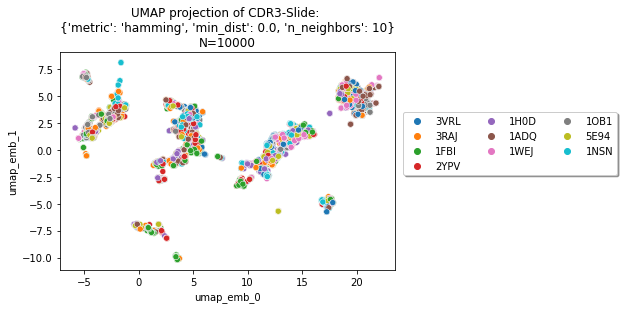

Computing for: {'metric': 'hamming', 'min_dist': 0.0, 'n_neighbors': 50}


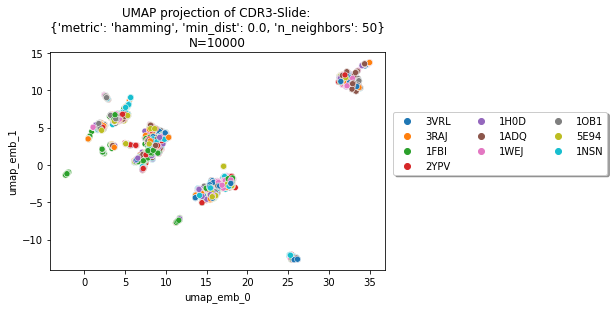

Computing for: {'metric': 'hamming', 'min_dist': 0.0, 'n_neighbors': 300}


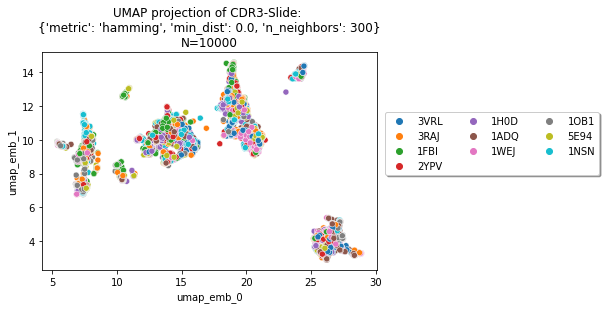

Computing for: {'metric': 'hamming', 'min_dist': 0.0, 'n_neighbors': 600}


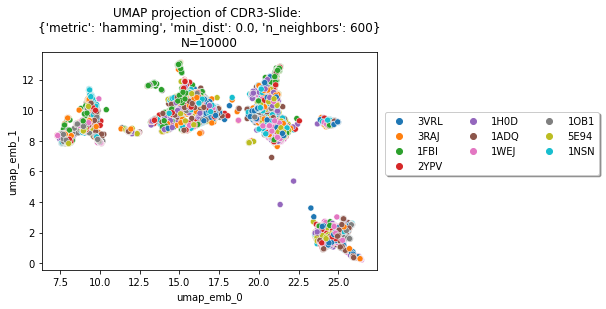

Computing for: {'metric': 'hamming', 'min_dist': 1e-06, 'n_neighbors': 10}


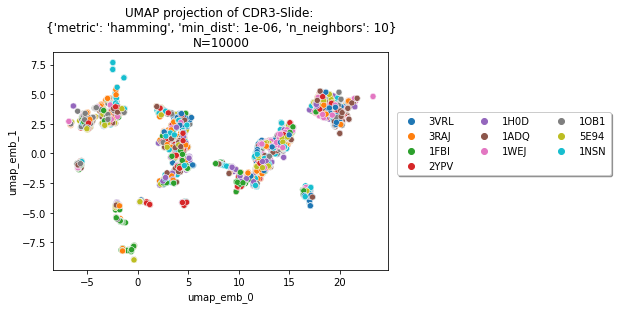

Computing for: {'metric': 'hamming', 'min_dist': 1e-06, 'n_neighbors': 50}


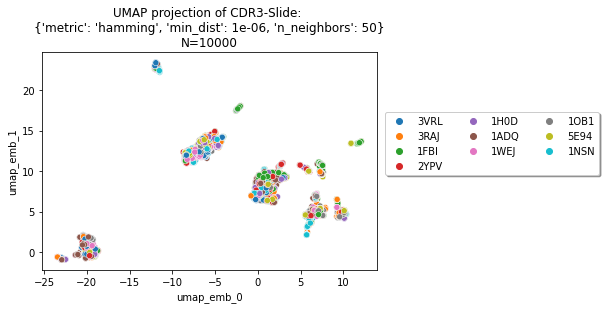

Computing for: {'metric': 'hamming', 'min_dist': 1e-06, 'n_neighbors': 300}


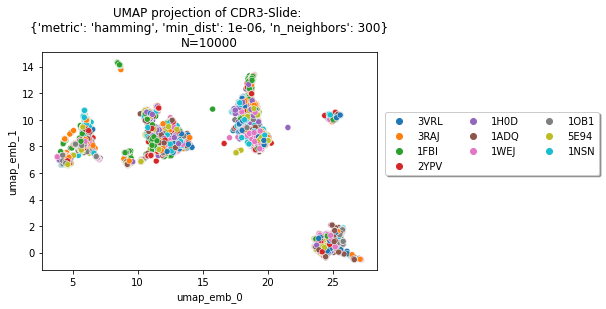

Computing for: {'metric': 'hamming', 'min_dist': 1e-06, 'n_neighbors': 600}


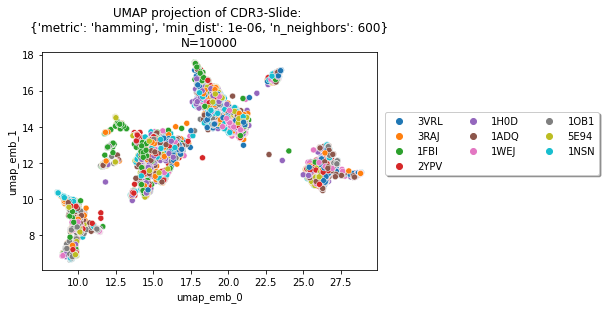

Computing for: {'metric': 'hamming', 'min_dist': 0.001, 'n_neighbors': 10}


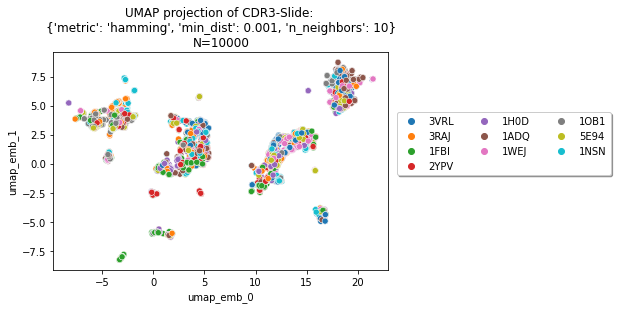

Computing for: {'metric': 'hamming', 'min_dist': 0.001, 'n_neighbors': 50}


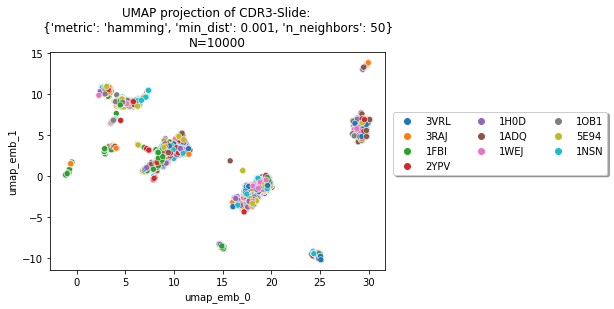

Computing for: {'metric': 'hamming', 'min_dist': 0.001, 'n_neighbors': 300}


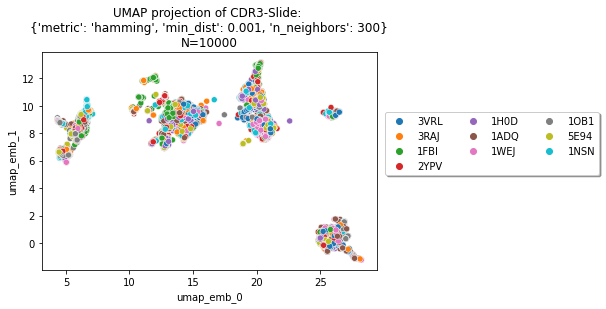

Computing for: {'metric': 'hamming', 'min_dist': 0.001, 'n_neighbors': 600}


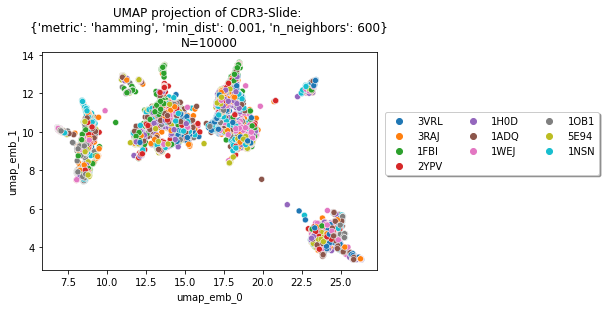

Computing for: {'metric': 'hamming', 'min_dist': 0.1, 'n_neighbors': 10}


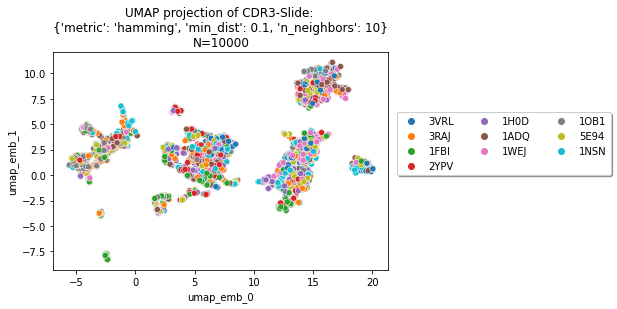

Computing for: {'metric': 'hamming', 'min_dist': 0.1, 'n_neighbors': 50}


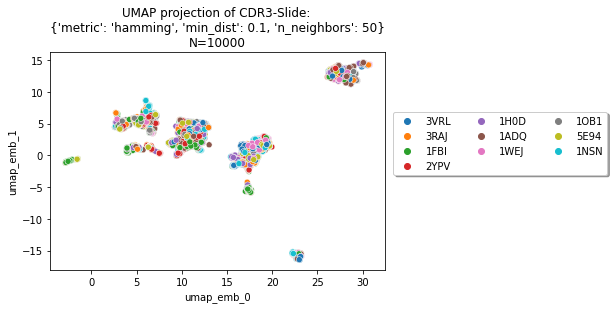

Computing for: {'metric': 'hamming', 'min_dist': 0.1, 'n_neighbors': 300}


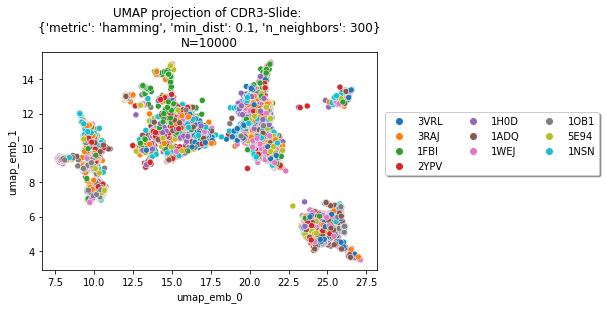

Computing for: {'metric': 'hamming', 'min_dist': 0.1, 'n_neighbors': 600}


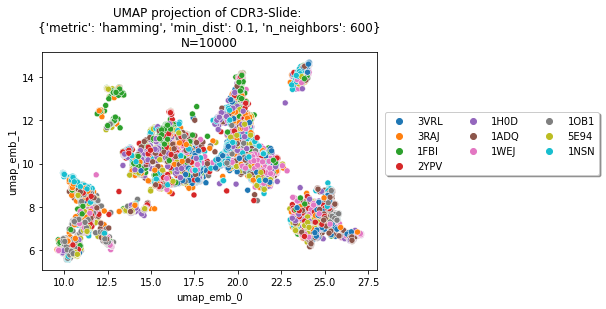

Computing for: {'metric': 'hamming', 'min_dist': 0.5, 'n_neighbors': 10}


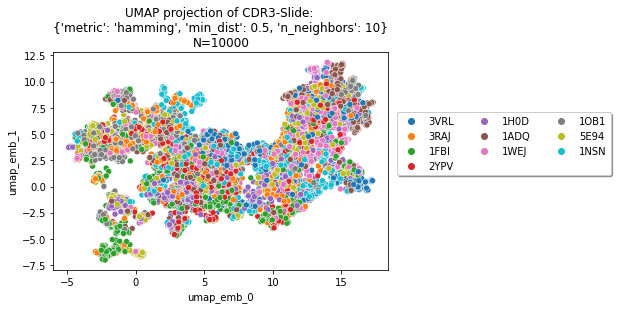

Computing for: {'metric': 'hamming', 'min_dist': 0.5, 'n_neighbors': 50}


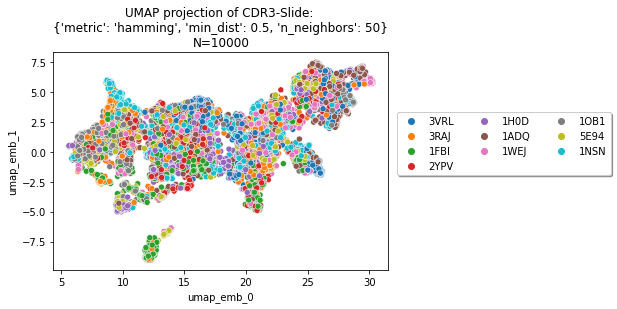

Computing for: {'metric': 'hamming', 'min_dist': 0.5, 'n_neighbors': 300}


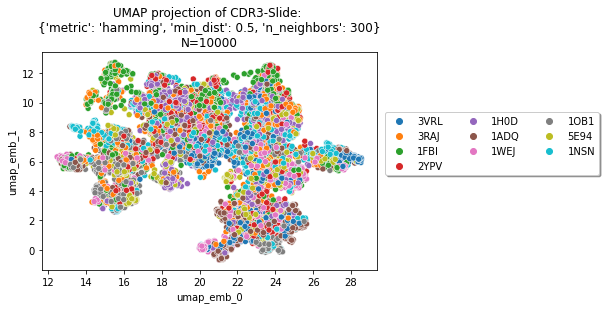

Computing for: {'metric': 'hamming', 'min_dist': 0.5, 'n_neighbors': 600}


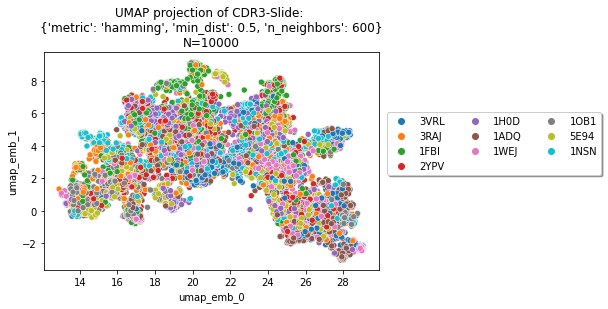

In [5]:
param_grid = ParameterGrid({
    "n_neighbors": [10, 50, 300,  600],
    "min_dist": [0.0, 1e-6, 1e-3, 0.1, 0.5],
    "metric": ["hamming"],
})


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for params in param_grid:
        print(f"Computing for: {params}")
        reducer = umap.UMAP(**params)
        embedding = reducer.fit_transform(scaled_slide_onehot_array)
        df_s["umap_emb_0"] = embedding[:, 0]
        df_s["umap_emb_1"] = embedding[:, 1]
        sns.scatterplot(data=df_s, x="umap_emb_0", y="umap_emb_1", hue="Antigen")
        plt.legend(bbox_to_anchor=(1.01, 0.75),
            ncol=3, fancybox=True, shadow=True)
        plt.title(f'UMAP projection of CDR3-Slide: \n{params}\nN={N}')
        plt.show()

A good parameter choice appears to be {'metric': 'hamming', 'min_dist': 0.0, 'n_neighbors': 50}. Let's do the whole dataset with this.

In [7]:
selected_params = {'metric': 'hamming', 'min_dist': 0.0, 'n_neighbors': 50}
scaled_slide_onehot_array = preprocessing.onehot_encode_df(df)

reducer = umap.UMAP(**selected_params)
embedding = reducer.fit_transform(scaled_slide_onehot_array)
df["umap_emb_0"] = embedding[:, 0]
df["umap_emb_1"] = embedding[:, 1]
sns.scatterplot(data=df, x="umap_emb_0", y="umap_emb_1", hue="Antigen")
plt.legend(bbox_to_anchor=(1.01, 0.75),
    ncol=3, fancybox=True, shadow=True)
plt.title(f'UMAP projection of CDR3-Slide: \n{params}\nN={df.shape[0]}')
plt.show()